In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fraud2.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,NaN,1,1,0,1,1,0,Laborers,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-1029,NaN,1,1,0,1,0,0,Laborers,2.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,-4409,NaN,1,1,1,1,1,0,Sales staff,2.0
4,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,-4199,NaN,1,0,0,1,0,0,NaN,2.0


In [5]:
df.shape

(74825, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74825 entries, 0 to 74824
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  74825 non-null  int64  
 1   TARGET                      74825 non-null  int64  
 2   NAME_CONTRACT_TYPE          74825 non-null  object 
 3   CODE_GENDER                 74825 non-null  object 
 4   FLAG_OWN_CAR                74825 non-null  object 
 5   FLAG_OWN_REALTY             74825 non-null  object 
 6   CNT_CHILDREN                74825 non-null  int64  
 7   AMT_INCOME_TOTAL            74825 non-null  float64
 8   AMT_CREDIT                  74825 non-null  float64
 9   AMT_ANNUITY                 74821 non-null  float64
 10  AMT_GOODS_PRICE             74755 non-null  float64
 11  NAME_TYPE_SUITE             74500 non-null  object 
 12  NAME_INCOME_TYPE            74825 non-null  object 
 13  NAME_EDUCATION_TYPE         748

In [7]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       4
AMT_GOODS_PRICE                  70
NAME_TYPE_SUITE                 325
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   50076
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [8]:
for i in df.select_dtypes(include='number').columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[i] < lower_bound) | (df[i] > upper_bound)
    print(i, outliers.sum())

SK_ID_CURR 0
TARGET 0
CNT_CHILDREN 1121
AMT_INCOME_TOTAL 3226
AMT_CREDIT 1607
AMT_ANNUITY 1730
AMT_GOODS_PRICE 3082
REGION_POPULATION_RELATIVE 1878
DAYS_BIRTH 0
DAYS_EMPLOYED 16398
DAYS_REGISTRATION 195
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 1099
FLAG_MOBIL 0
FLAG_EMP_PHONE 12178
FLAG_WORK_PHONE 15757
FLAG_CONT_MOBILE 134
FLAG_PHONE 0
FLAG_EMAIL 4257
CNT_FAM_MEMBERS 1054


In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,74825.000000,74825.000000,74825.000000,7.482500e+04,7.482500e+04,74821.000000,7.475500e+04,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,24749.000000,74825.0,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74824.000000
mean,278091.438517,0.331774,0.429509,1.683915e+05,5.876002e+05,26951.015250,5.246092e+05,0.020489,-15702.466301,57569.499058,-4835.018657,-2917.697467,12.458847,1.0,0.837247,0.210585,0.998209,0.271901,0.056893,2.160737
std,102708.909416,0.470854,0.730592,4.424101e+05,3.879019e+05,14012.641593,3.543813e+05,0.013501,4339.689620,135655.520104,3460.106097,1516.838262,12.114476,0.0,0.369143,0.407727,0.042281,0.444942,0.231639,0.921202
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1993.500000,4.500000e+04,0.000533,-25197.000000,-17546.000000,-22928.000000,-6263.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,189439.000000,0.000000,0.000000,1.125000e+05,2.736360e+05,16821.000000,2.385000e+05,0.010006,-19269.000000,-2606.000000,-7245.000000,-4252.000000,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,277569.000000,0.000000,0.000000,1.440000e+05,5.084955e+05,24984.000000,4.500000e+05,0.018850,-15315.000000,-1155.000000,-4364.000000,-3120.000000,10.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,367088.000000,1.000000,1.000000,2.025000e+05,7.908300e+05,34132.500000,6.750000e+05,0.026392,-12062.000000,-326.000000,-1898.000000,-1612.000000,16.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,456254.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7678.000000,365243.000000,0.000000,0.000000,91.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


# Null value handling

In [10]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       4
AMT_GOODS_PRICE                  70
NAME_TYPE_SUITE                 325
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   50076
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [11]:
df['AMT_GOODS_PRICE'].value_counts().sort_index()

AMT_GOODS_PRICE
45000.0      257
49500.0       38
54000.0       66
58500.0       72
63000.0       25
            ... 
3150000.0      2
3555000.0      1
3600000.0      2
3825000.0      1
4050000.0      1
Name: count, Length: 574, dtype: int64

In [12]:
df['AMT_GOODS_PRICE'].mean()

524609.2476021671

In [13]:
df['AMT_GOODS_PRICE'].median()

450000.0

In [14]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace = True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_876\2407887376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace = True)


In [15]:
df['AMT_GOODS_PRICE'].isnull().sum()

0

In [16]:
df['AMT_ANNUITY'].value_counts()

AMT_ANNUITY
9000.0     1525
13500.0    1258
6750.0      513
10125.0     472
26640.0     426
           ... 
55192.5       1
35932.5       1
42430.5       1
74124.0       1
49734.0       1
Name: count, Length: 9895, dtype: int64

In [17]:
df['AMT_ANNUITY'].mean()

26951.015249729353

In [18]:
df['AMT_ANNUITY'].median()

24984.0

In [19]:
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median())

In [20]:
df['AMT_ANNUITY'].isnull().sum()

0

In [21]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      60613
Family              9600
Spouse, partner     2800
Children             747
Other_B              449
Other_A              232
Group of people       59
Name: count, dtype: int64

In [22]:
df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [23]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])

In [24]:
df['NAME_TYPE_SUITE'].isnull().sum()

0

In [25]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 14610
Sales staff               8193
Core staff                6275
Drivers                   5025
Managers                  4946
High skill tech staff     2579
Accountants               2132
Medicine staff            1951
Security staff            1781
Cooking staff             1524
Cleaning staff            1187
Low-skill Laborers         668
Private service staff      622
Waiters/barmen staff       373
Secretaries                317
Realty agents              193
HR staff                   126
IT staff                   122
Name: count, dtype: int64

In [26]:
df['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [27]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

In [28]:
df['OCCUPATION_TYPE'].isnull().sum()

0

In [29]:
df['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     37883
1.0     16671
3.0     13107
4.0      6109
5.0       902
6.0       123
7.0        15
8.0         9
10.0        2
13.0        1
11.0        1
12.0        1
Name: count, dtype: int64

In [30]:
df['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [31]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0])

In [32]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   50076
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [33]:
df = df.drop(columns = ['OWN_CAR_AGE'])

In [34]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
dtype: int64

In [35]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0
4,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,-5391.0,-4199,1,0,0,1,0,0,Laborers,2.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74825 entries, 0 to 74824
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  74825 non-null  int64  
 1   TARGET                      74825 non-null  int64  
 2   NAME_CONTRACT_TYPE          74825 non-null  object 
 3   CODE_GENDER                 74825 non-null  object 
 4   FLAG_OWN_CAR                74825 non-null  object 
 5   FLAG_OWN_REALTY             74825 non-null  object 
 6   CNT_CHILDREN                74825 non-null  int64  
 7   AMT_INCOME_TOTAL            74825 non-null  float64
 8   AMT_CREDIT                  74825 non-null  float64
 9   AMT_ANNUITY                 74825 non-null  float64
 10  AMT_GOODS_PRICE             74825 non-null  float64
 11  NAME_TYPE_SUITE             74825 non-null  object 
 12  NAME_INCOME_TYPE            74825 non-null  object 
 13  NAME_EDUCATION_TYPE         748

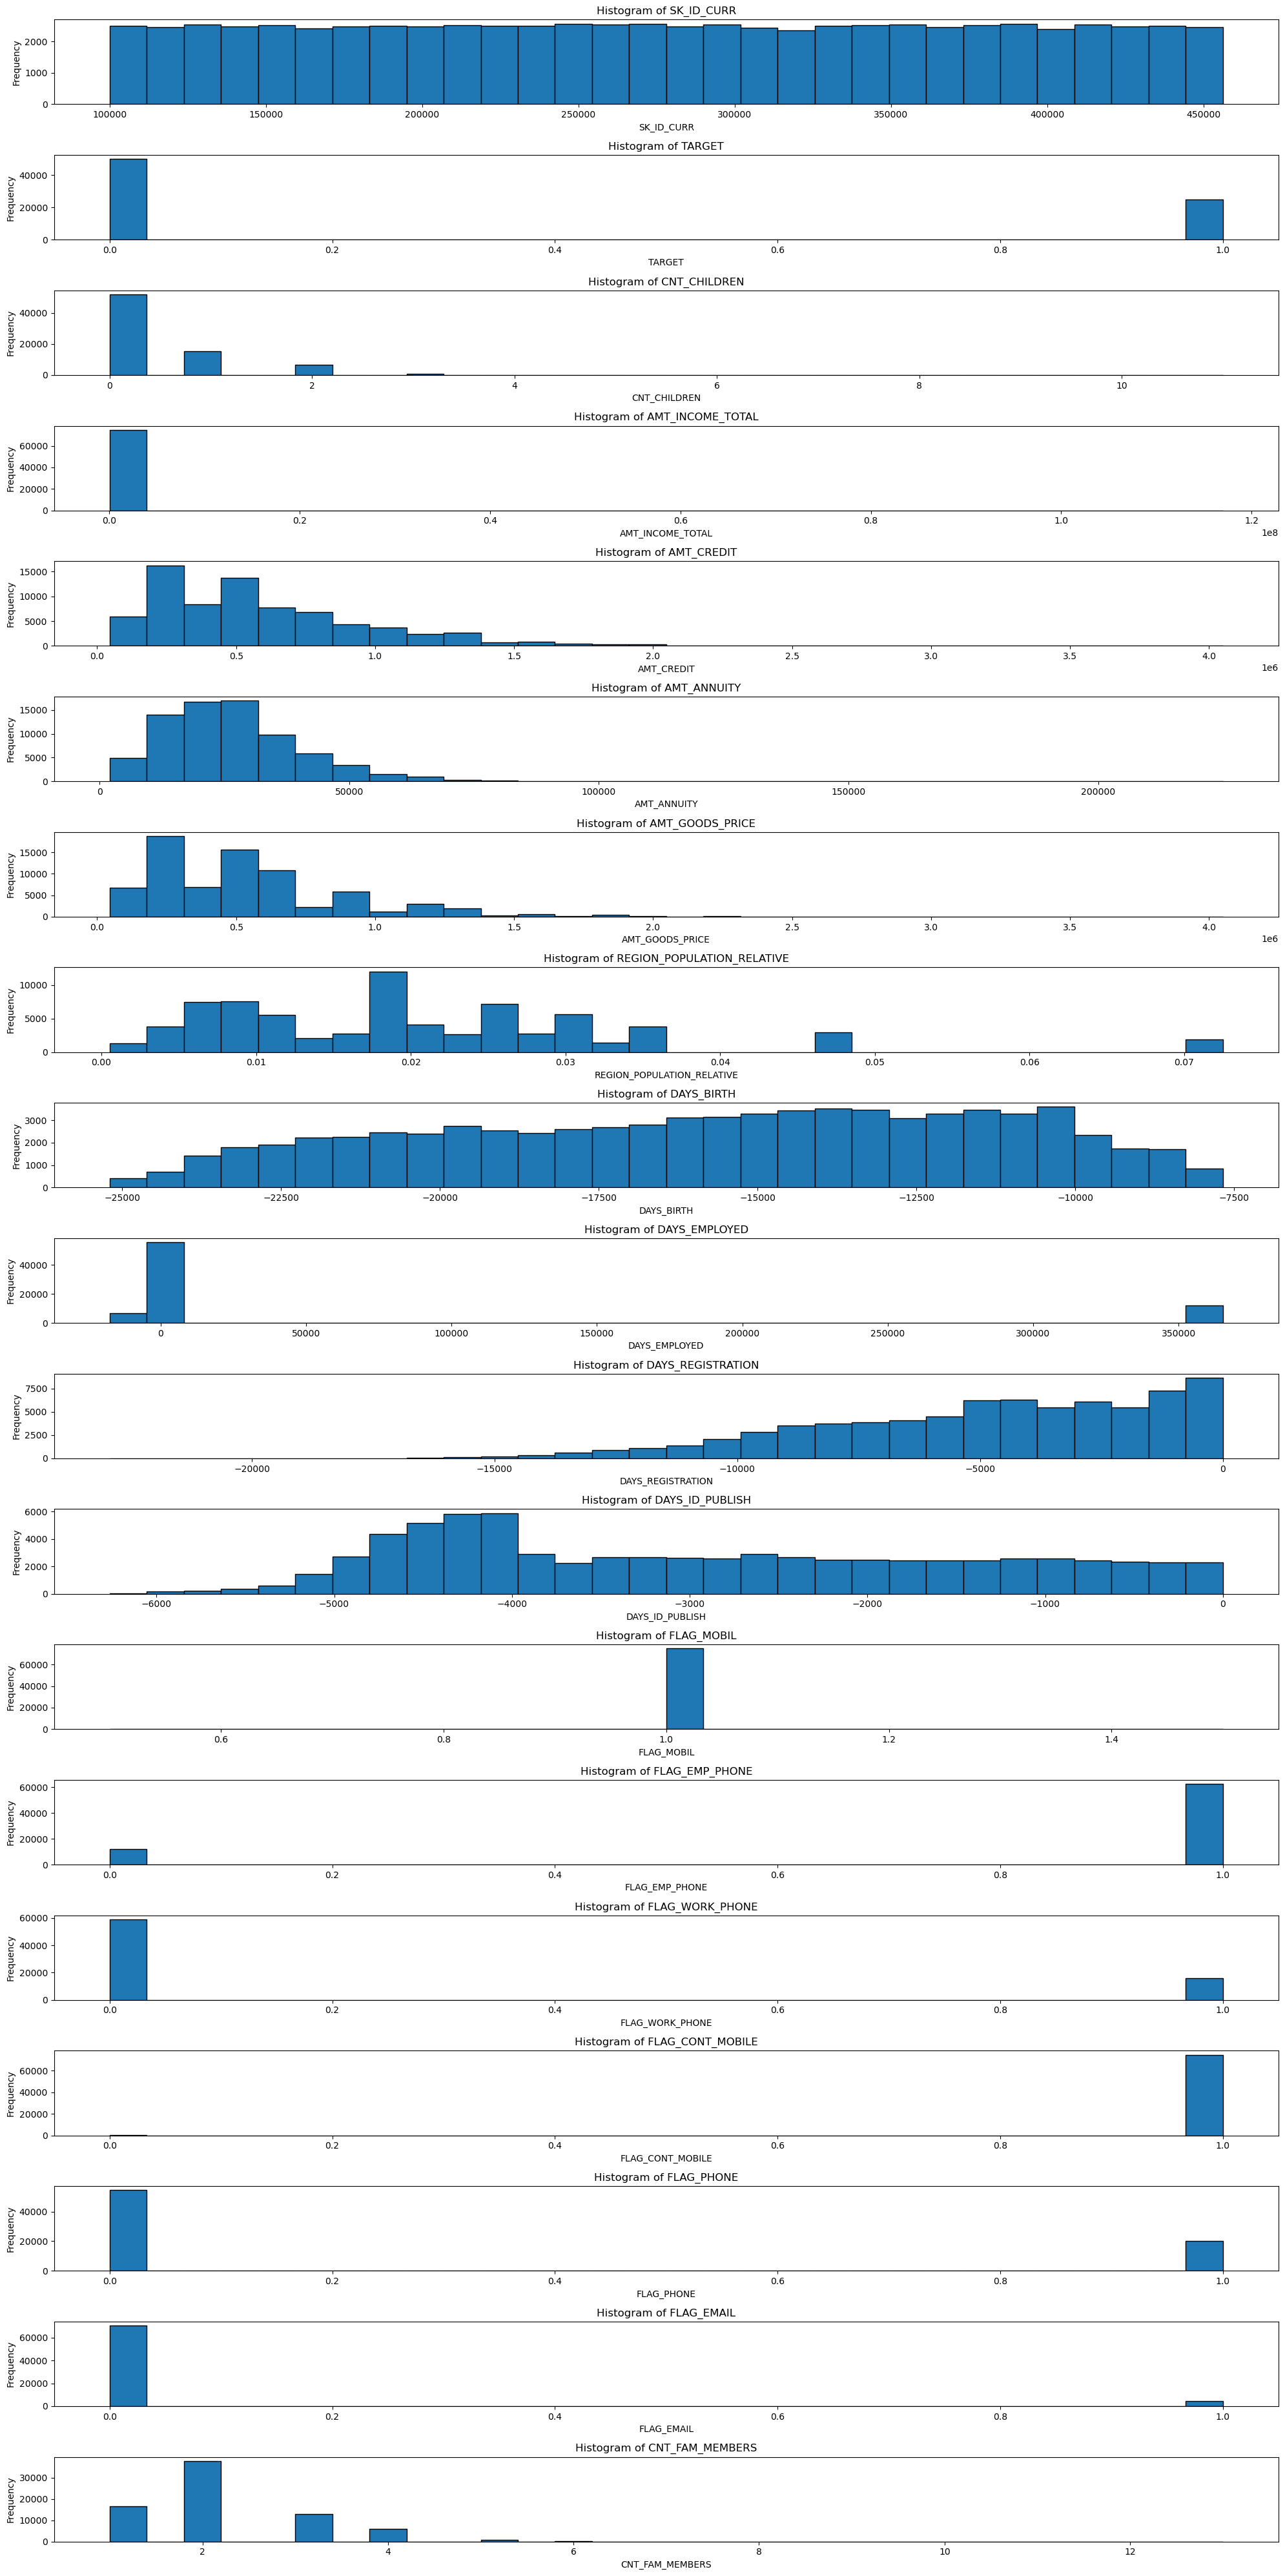

In [37]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74825 entries, 0 to 74824
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  74825 non-null  int64  
 1   TARGET                      74825 non-null  int64  
 2   NAME_CONTRACT_TYPE          74825 non-null  object 
 3   CODE_GENDER                 74825 non-null  object 
 4   FLAG_OWN_CAR                74825 non-null  object 
 5   FLAG_OWN_REALTY             74825 non-null  object 
 6   CNT_CHILDREN                74825 non-null  int64  
 7   AMT_INCOME_TOTAL            74825 non-null  float64
 8   AMT_CREDIT                  74825 non-null  float64
 9   AMT_ANNUITY                 74825 non-null  float64
 10  AMT_GOODS_PRICE             74825 non-null  float64
 11  NAME_TYPE_SUITE             74825 non-null  object 
 12  NAME_INCOME_TYPE            74825 non-null  object 
 13  NAME_EDUCATION_TYPE         748

### Feature Extraction

In [39]:
df.drop(columns = 'SK_ID_CURR', inplace = True)

In [40]:
df['DAYS_BIRTH'].value_counts().sort_index()

DAYS_BIRTH
-25197    1
-25186    1
-25179    1
-25177    1
-25175    1
         ..
-7684     1
-7683     1
-7682     1
-7680     1
-7678     1
Name: count, Length: 16550, dtype: int64

In [41]:
df['AGE'] = df['DAYS_BIRTH'].abs()

df['AGE'] = df['AGE'] // 365

print(df['AGE'])

0        25
1        51
2        47
3        36
4        67
         ..
74820    55
74821    30
74822    42
74823    28
74824    44
Name: AGE, Length: 74825, dtype: int64


In [42]:
df.drop(columns = ['DAYS_BIRTH'], inplace = True)

In [43]:
df['AGE'].isnull().sum()

0

In [44]:
df['DAYS_EMPLOYED'].value_counts().sort_index()

DAYS_EMPLOYED
-17546         1
-16849         1
-16495         1
-16452         1
-16360         1
           ...  
-4             2
-3             1
-2             1
 0             1
 365243    12176
Name: count, Length: 8777, dtype: int64

In [45]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()

# Convert days to years (if needed)
df['EMPLOYMENT_YEARS'] = df['DAYS_EMPLOYED'] // 365

In [46]:
df['EMPLOYMENT_YEARS'].value_counts().sort_index()

EMPLOYMENT_YEARS
0        7423
1        8643
2        7934
3        6476
4        5500
5        3965
6        3540
7        3148
8        2689
9        2049
10       1671
11       1323
12       1217
13       1004
14       1006
15        582
16        495
17        453
18        433
19        407
20        348
21        331
22        258
23        232
24        196
25        177
26        125
27        127
28        144
29        131
30        103
31        101
32         68
33         74
34         72
35         52
36         34
37         26
38         18
39         33
40         13
41          9
42          9
43          1
44          5
45          2
46          1
48          1
1000    12176
Name: count, dtype: int64

In [47]:
df = df.drop(columns = ['DAYS_EMPLOYED'])

In [48]:
df['DAYS_REGISTRATION'].value_counts().sort_index()

DAYS_REGISTRATION
-22928.0     1
-21865.0     1
-20840.0     1
-20741.0     1
-20623.0     1
            ..
-4.0        28
-3.0        19
-2.0        32
-1.0        38
 0.0        20
Name: count, Length: 13322, dtype: int64

In [49]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].abs()

# Convert days to years (if needed)
df['REGISTRATION_YEARS'] = df['DAYS_REGISTRATION'] // 365

In [50]:
df = df.drop(columns = ['DAYS_REGISTRATION'])

In [51]:
df['REGISTRATION_YEARS'].value_counts().sort_index()

REGISTRATION_YEARS
0.0     4319
1.0     3971
2.0     3860
3.0     3188
4.0     2785
5.0     2586
6.0     2730
7.0     3006
8.0     2738
9.0     2571
10.0    2664
11.0    3142
12.0    3177
13.0    3107
14.0    2451
15.0    2109
16.0    2162
17.0    1974
18.0    1913
19.0    1962
20.0    1742
21.0    1723
22.0    1841
23.0    1647
24.0    1721
25.0    1448
26.0    1315
27.0    1110
28.0     948
29.0     780
30.0     637
31.0     561
32.0     533
33.0     457
34.0     427
35.0     355
36.0     311
37.0     212
38.0     174
39.0     117
40.0      95
41.0      70
42.0      58
43.0      39
44.0      25
45.0      16
46.0       7
47.0       7
48.0       7
49.0       5
50.0       4
51.0       3
52.0       2
53.0       6
55.0       1
56.0       3
57.0       1
59.0       1
62.0       1
Name: count, dtype: int64

In [52]:
df['DAYS_ID_PUBLISH'].value_counts().sort_index()

DAYS_ID_PUBLISH
-6263     1
-6226     1
-6214     1
-6211     1
-6207     1
         ..
-4       11
-3       10
-2       13
-1       19
 0        3
Name: count, Length: 5847, dtype: int64

In [53]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs()

# Convert days to years (if needed)
df['PUBLISH_YEARS'] = df['DAYS_ID_PUBLISH'] // 365

In [54]:
df = df.drop(columns = ['DAYS_ID_PUBLISH'])

In [55]:
df['PUBLISH_YEARS'].value_counts().sort_index()

PUBLISH_YEARS
0      3960
1      4091
2      4526
3      4373
4      4186
5      4364
6      4654
7      4764
8      4579
9      4581
10     5156
11    10396
12     8677
13     4581
14     1300
15      441
16      191
17        5
Name: count, dtype: int64

In [56]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,EMPLOYMENT_YEARS,REGISTRATION_YEARS,PUBLISH_YEARS
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,1,1,0,Laborers,1.0,25,1,9.0,5
1,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,...,0,1,0,0,Cooking staff,1.0,51,7,18.0,5
2,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,1,0,0,Laborers,2.0,47,3,3.0,2
3,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,...,1,1,1,0,Sales staff,2.0,36,9,0.0,12
4,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,0,1,0,0,Laborers,2.0,67,1000,14.0,11


In [57]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 36811
Sales staff               8193
Core staff                6275
Drivers                   5025
Managers                  4946
High skill tech staff     2579
Accountants               2132
Medicine staff            1951
Security staff            1781
Cooking staff             1524
Cleaning staff            1187
Low-skill Laborers         668
Private service staff      622
Waiters/barmen staff       373
Secretaries                317
Realty agents              193
HR staff                   126
IT staff                   122
Name: count, dtype: int64

In [58]:
for i in df.select_dtypes(include='number').columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[i] < lower_bound) | (df[i] > upper_bound)
    print(i, outliers.sum())

TARGET 0
CNT_CHILDREN 1121
AMT_INCOME_TOTAL 3226
AMT_CREDIT 1607
AMT_ANNUITY 1731
AMT_GOODS_PRICE 3082
REGION_POPULATION_RELATIVE 1878
FLAG_MOBIL 0
FLAG_EMP_PHONE 12178
FLAG_WORK_PHONE 15757
FLAG_CONT_MOBILE 134
FLAG_PHONE 0
FLAG_EMAIL 4257
CNT_FAM_MEMBERS 1054
AGE 0
EMPLOYMENT_YEARS 12798
REGISTRATION_YEARS 256
PUBLISH_YEARS 0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74825 entries, 0 to 74824
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET                      74825 non-null  int64  
 1   NAME_CONTRACT_TYPE          74825 non-null  object 
 2   CODE_GENDER                 74825 non-null  object 
 3   FLAG_OWN_CAR                74825 non-null  object 
 4   FLAG_OWN_REALTY             74825 non-null  object 
 5   CNT_CHILDREN                74825 non-null  int64  
 6   AMT_INCOME_TOTAL            74825 non-null  float64
 7   AMT_CREDIT                  74825 non-null  float64
 8   AMT_ANNUITY                 74825 non-null  float64
 9   AMT_GOODS_PRICE             74825 non-null  float64
 10  NAME_TYPE_SUITE             74825 non-null  object 
 11  NAME_INCOME_TYPE            74825 non-null  object 
 12  NAME_EDUCATION_TYPE         74825 non-null  object 
 13  NAME_FAMILY_STATUS          748

### Feature Scaling 

In [60]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [61]:
columns_to_scale = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYMENT_YEARS', 
                    'REGISTRATION_YEARS', 'PUBLISH_YEARS'
                   ]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [62]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,EMPLOYMENT_YEARS,REGISTRATION_YEARS,PUBLISH_YEARS
count,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.0,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000,74825.000000
mean,0.331774,0.429509,0.271017,0.152950,0.113648,0.170766,0.099995,1.0,0.837247,0.210585,0.998209,0.271901,0.056893,0.160735,0.080037,14.765713,0.125325,-0.070817
std,0.470854,0.730592,4.915668,0.750012,0.809630,0.811507,0.823955,0.0,0.369143,0.407727,0.042281,0.444942,0.231639,0.921196,0.625729,33.371873,0.676712,0.593297
min,0.000000,0.000000,-1.315000,-0.896173,-1.328393,-0.927835,-1.117845,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.052632,-0.454545,-0.785714,-1.142857
25%,0.000000,0.000000,-0.350000,-0.454103,-0.471659,-0.484536,-0.539729,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.421053,-0.272727,-0.428571,-0.571429
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.650000,0.545897,0.528341,0.515464,0.460271,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.578947,0.727273,0.571429,0.428571
max,1.000000,11.000000,1298.400000,6.847536,11.556942,8.247423,3.274625,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.473684,90.454545,3.642857,1.285714


In [63]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,EMPLOYMENT_YEARS,REGISTRATION_YEARS,PUBLISH_YEARS
0,1,Cash loans,M,N,Y,0.0,0.65,-0.197021,-0.016381,-0.226804,...,0,1,1,0,Laborers,-1.0,-0.842105,-0.363636,-0.142857,-0.428571
1,1,Cash loans,F,N,Y,0.0,-0.35,0.911643,0.120905,0.577320,...,0,1,0,0,Cooking staff,-1.0,0.526316,0.181818,0.500000,-0.428571
2,1,Cash loans,M,N,Y,0.0,0.65,1.324618,0.580343,0.927835,...,0,1,0,0,Laborers,0.0,0.315789,-0.181818,-0.571429,-0.857143
3,1,Cash loans,F,N,N,0.0,-0.10,-0.424642,-0.504160,-0.484536,...,1,1,1,0,Sales staff,0.0,-0.263158,0.363636,-0.785714,0.571429
4,1,Cash loans,F,N,Y,0.0,-0.70,-0.495937,-0.600364,-0.453608,...,0,1,0,0,Laborers,0.0,1.368421,90.454545,0.214286,0.428571


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74825 entries, 0 to 74824
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET                      74825 non-null  int64  
 1   NAME_CONTRACT_TYPE          74825 non-null  object 
 2   CODE_GENDER                 74825 non-null  object 
 3   FLAG_OWN_CAR                74825 non-null  object 
 4   FLAG_OWN_REALTY             74825 non-null  object 
 5   CNT_CHILDREN                74825 non-null  float64
 6   AMT_INCOME_TOTAL            74825 non-null  float64
 7   AMT_CREDIT                  74825 non-null  float64
 8   AMT_ANNUITY                 74825 non-null  float64
 9   AMT_GOODS_PRICE             74825 non-null  float64
 10  NAME_TYPE_SUITE             74825 non-null  object 
 11  NAME_INCOME_TYPE            74825 non-null  object 
 12  NAME_EDUCATION_TYPE         74825 non-null  object 
 13  NAME_FAMILY_STATUS          748

In [65]:
df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         68288
Revolving loans     6537
Name: count, dtype: int64

### Encoding 

In [66]:
df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE'], drop_first=True)

In [67]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    47269
M    27556
Name: count, dtype: int64

In [68]:
df = pd.get_dummies(df, columns=['CODE_GENDER'], drop_first=True)

In [69]:
df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    50075
Y    24750
Name: count, dtype: int64

In [70]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})

In [71]:
df['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    51949
N    22876
Name: count, dtype: int64

In [72]:
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

In [73]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      60938
Family              9600
Spouse, partner     2800
Children             747
Other_B              449
Other_A              232
Group of people       59
Name: count, dtype: int64

In [74]:
df = pd.get_dummies(df, columns=['NAME_TYPE_SUITE'], drop_first=True)

In [75]:
df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 40639
Commercial associate    17181
Pensioner               12167
State servant            4821
Unemployed                 10
Student                     4
Maternity leave             3
Name: count, dtype: int64

In [76]:
df = pd.get_dummies(df, columns=['NAME_INCOME_TYPE'], drop_first=True)

In [77]:
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    54568
Higher education                 16599
Incomplete higher                 2603
Lower secondary                   1021
Academic degree                     34
Name: count, dtype: int64

In [78]:
from sklearn.preprocessing import OrdinalEncoder
categories = [
    'Lower secondary',
    'Incomplete higher',
    'Secondary / secondary special',
    'Higher education',
    'Academic degree'
]
ordinal_encoder = OrdinalEncoder(categories=[categories])

df['NAME_EDUCATION_TYPE'] = ordinal_encoder.fit_transform(df[['NAME_EDUCATION_TYPE']])

In [79]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 46994
Single / not married    11722
Civil marriage           7719
Separated                4800
Widow                    3589
Unknown                     1
Name: count, dtype: int64

In [80]:
df = pd.get_dummies(df, columns=['NAME_FAMILY_STATUS'], drop_first=True)

In [81]:
df['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      65844
With parents            3998
Municipal apartment     2747
Rented apartment        1398
Office apartment         578
Co-op apartment          260
Name: count, dtype: int64

In [82]:
df = pd.get_dummies(df, columns=['NAME_HOUSING_TYPE'], drop_first=True)

In [83]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 36811
Sales staff               8193
Core staff                6275
Drivers                   5025
Managers                  4946
High skill tech staff     2579
Accountants               2132
Medicine staff            1951
Security staff            1781
Cooking staff             1524
Cleaning staff            1187
Low-skill Laborers         668
Private service staff      622
Waiters/barmen staff       373
Secretaries                317
Realty agents              193
HR staff                   126
IT staff                   122
Name: count, dtype: int64

In [84]:
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(cols=['OCCUPATION_TYPE'], sigma=0.1)

df['OCCUPATION_TYPE'] = encoder.fit_transform(df['OCCUPATION_TYPE'], df['TARGET'])

In [85]:
df.head()

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,0,1,0.0,0.65,-0.197021,-0.016381,-0.226804,2.0,-0.002990,...,False,False,True,False,False,True,False,False,False,False
1,1,0,1,0.0,-0.35,0.911643,0.120905,0.577320,2.0,-0.050104,...,False,False,False,False,True,True,False,False,False,False
2,1,0,1,0.0,0.65,1.324618,0.580343,0.927835,2.0,0.385329,...,True,False,False,False,False,True,False,False,False,False
3,1,0,0,0.0,-0.10,-0.424642,-0.504160,-0.484536,2.0,-0.704565,...,False,False,False,False,False,True,False,False,False,False
4,1,0,1,0.0,-0.70,-0.495937,-0.600364,-0.453608,2.0,0.598865,...,True,False,False,False,False,True,False,False,False,False


In [86]:
df.shape

(74825, 46)

In [87]:
df['OCCUPATION_TYPE']

0        0.332102
1        0.344315
2        0.310295
3        0.423112
4        0.335335
           ...   
74820    0.316772
74821    0.348069
74822    0.384238
74823    0.270479
74824    0.303828
Name: OCCUPATION_TYPE, Length: 74825, dtype: float64

### Feature Selection 

In [88]:
correlation_matrix = df.corr()

# Select features with high correlation to the target
correlation_threshold = 0.1
selected_features = correlation_matrix['TARGET'][abs(correlation_matrix['TARGET']) > correlation_threshold].index.tolist()

In [89]:
df.corr()['TARGET']

TARGET                                     1.000000
FLAG_OWN_CAR                              -0.038333
FLAG_OWN_REALTY                           -0.015546
CNT_CHILDREN                               0.033079
AMT_INCOME_TOTAL                          -0.004427
AMT_CREDIT                                -0.054172
AMT_ANNUITY                               -0.023593
AMT_GOODS_PRICE                           -0.070817
NAME_EDUCATION_TYPE                       -0.088956
REGION_POPULATION_RELATIVE                -0.070870
FLAG_MOBIL                                      NaN
FLAG_EMP_PHONE                             0.080686
FLAG_WORK_PHONE                            0.047076
FLAG_CONT_MOBILE                          -0.000364
FLAG_PHONE                                -0.042674
FLAG_EMAIL                                -0.004701
OCCUPATION_TYPE                            0.088441
CNT_FAM_MEMBERS                            0.015707
AGE                                       -0.132805
EMPLOYMENT_Y

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.decomposition import PCA

In [91]:
# Yüksək VİF dəyərlərinə sahib olan dəyişənlərin datasetdən çıxarılması üçün funksiyanın yazılması
from sklearn.impute import SimpleImputer
def drop_features_with_high_vif(data_frame = None, vif_threshold = 5):
    features = data_frame.select_dtypes(include = 'number').drop(columns = 'TARGET').columns.tolist()
    X = data_frame[features].copy()
    imputer = SimpleImputer(strategy = 'median')
    X = pd.DataFrame(data = imputer.fit_transform(X = X), columns = features)
    
    vif_df = pd.DataFrame()
    vif_df['feature'] = X.columns
    vif_df['vif_value'] = [VIF(exog = X.values, exog_idx = i) for i in range(len(X.columns))]
    
    features_with_max_vif_value = []
    
    while vif_df.vif_value.max() > vif_threshold:
        feature_with_max_vif_value = vif_df.loc[vif_df.vif_value == vif_df.vif_value.max(), 'feature'].values[0]
        features_with_max_vif_value.append(feature_with_max_vif_value)
        X.drop(columns = feature_with_max_vif_value, inplace = True)
        
        vif_df = pd.DataFrame()
        vif_df['feature'] = X.columns
        vif_df['vif_value'] = [VIF(exog = X.values, exog_idx = i) for i in range(len(X.columns))]
    
    data_frame.drop(columns = features_with_max_vif_value, inplace = True)
    
    return data_frame

In [92]:
df = drop_features_with_high_vif(data_frame = df)

In [94]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

selected_features_indices = np.where(lasso.coef_ != 0)[0]

In [95]:
selected_features_indices

array([ 0,  3,  5,  6, 11, 12, 13, 14, 16, 28], dtype=int64)

In [96]:
selected_features = X.columns[selected_features_indices].tolist()

In [97]:
len(selected_features)

10

In [98]:
selected_features

['FLAG_OWN_CAR',
 'AMT_CREDIT',
 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'EMPLOYMENT_YEARS',
 'REGISTRATION_YEARS',
 'PUBLISH_YEARS',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Working']

### Train test split

In [99]:
X = df[selected_features]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, f1_score, recall_score

In [103]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)



rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.6732375542933512
              precision    recall  f1-score   support

           0       0.70      0.89      0.79     10051
           1       0.51      0.23      0.32      4914

    accuracy                           0.67     14965
   macro avg       0.60      0.56      0.55     14965
weighted avg       0.64      0.67      0.63     14965



In [104]:
recall_score(y_test, y_pred)

0.2317867317867318

In [105]:
f1_score(y_test, y_pred)

0.3178013392857143

### XGBOOST

In [106]:
import xgboost as xgb

# Modeli yaradın və təlim edin
gbm_model = xgb.XGBClassifier(use_label_encoder=False)
gbm_model.fit(x_train, y_train)

# Proqnozlar və qiymətləndirmə
y_pred_gbm = gbm_model.predict(x_test)
print("Gradient Boosting Machines")
print(confusion_matrix(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Machines
[[8992 1059]
 [3654 1260]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     10051
           1       0.54      0.26      0.35      4914

    accuracy                           0.69     14965
   macro avg       0.63      0.58      0.57     14965
weighted avg       0.66      0.69      0.65     14965



C:\Users\ROG\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res2, y_res2 = smote.fit_resample(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res2, y_res2, test_size=0.2, random_state=42)

In [109]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)



rf_classifier.fit(X_train2, y_train2)

y_pred = rf_classifier.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test2, y_pred))

Accuracy: 0.75925
              precision    recall  f1-score   support

           0       0.73      0.82      0.77     10006
           1       0.79      0.70      0.74      9994

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



In [111]:
f1_score(y_test2, y_pred)

0.7449006622516556

In [112]:
recall_score(y_test2, y_pred)

0.7034220532319392

In [114]:
import xgboost as xgb

# Modeli yaradın və təlim edin
gbm_model = xgb.XGBClassifier(use_label_encoder=False)
gbm_model.fit(X_train2, y_train2)

# Proqnozlar və qiymətləndirmə
y_pred_gbm = gbm_model.predict(X_test2)
print("Gradient Boosting Machines")
print(confusion_matrix(y_test2, y_pred_gbm))
print(classification_report(y_test2, y_pred_gbm))

Gradient Boosting Machines
[[8626 1380]
 [3641 6353]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     10006
           1       0.82      0.64      0.72      9994

    accuracy                           0.75     20000
   macro avg       0.76      0.75      0.75     20000
weighted avg       0.76      0.75      0.75     20000



C:\Users\ROG\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:41:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [115]:
recall_score(y_test2, y_pred_gbm)

0.6356814088453072

In [116]:
f1_score(y_test2, y_pred_gbm)

0.7167597450217182